# Principal Component Analysis
Principal Component Analysis (PCA) is an unsupervised learning algorithm used for dimensionality reduction.

## Import Libraries

In [44]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})

## Load Data and Preprocess

In [45]:
path = "data/nndb_flat.csv" # taken from https://data.world/exercises/principal-components-exercise-1
data = pd.read_csv(path, sep = ",")
data.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [46]:
# For simplicity, we drop some features that require preprocessing.
features_to_drop = ["ID", "FoodGroup", "ShortDescrip", "Descrip", "CommonName", "MfgName", "ScientificName"]
data = data.drop(features_to_drop, axis = 1)

# data = data.iloc[:,:2]

feature_names = list(data.columns.values)

In [47]:
data.head(5)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [48]:
data.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


## PCA begins.

### Standardize the data.
Since we will use the covariance of the data set in PCA, we standardize the data so as to prevent from a single feature biasing the covarinace matrix.

In [49]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data.shape

(8618, 38)

## Calculate the covariance matrix.

In [50]:
covariance = np.cov(standardized_data.T) # VVI numpy requires the rows to be variables, hence T for transpose.
covariance.shape

(38, 38)

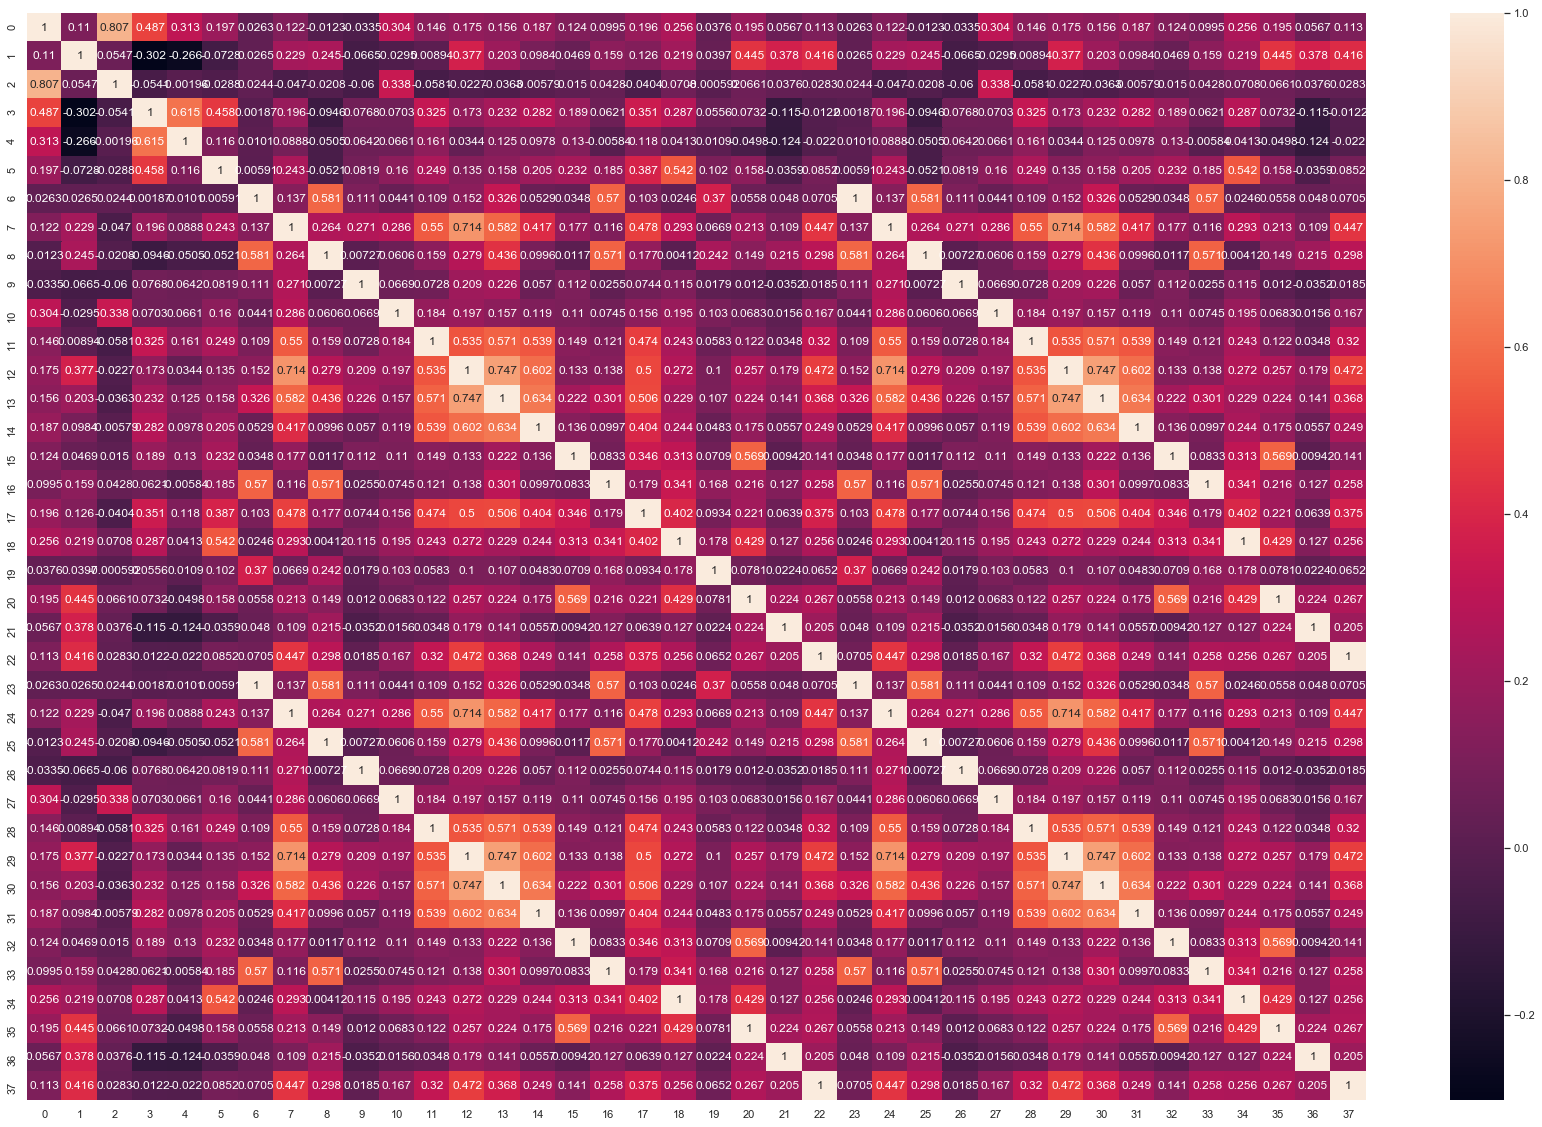

In [51]:
plt.figure(figsize = (30,20))
sns.heatmap(covariance, annot = True, fmt = '.3g')

It is evident from the heatmap that there exist features that have a perfect linear relationship because they have a covariance of 1. Thus, they are essentially giving our the same information. We are better off reducing the dimensions.

### Calcuate the Eigen Vectors and Eigen Values.

In [52]:
#eig_vals_ascending, eig_vecs_ascending = np.linalg.eigh(covariance)

eig_vals_ascending, eig_vecs_ascending = np.linalg.eigh(covariance)
# eigh() returns eigen vectors as columns. These eigen vectors are already normalized.
eig_vecs_ascending.shape

(38, 38)

In [53]:
# Transpose to get them in rows.
eig_vecs_ascending = eig_vecs_ascending.T

eig_vals_desc = np.flipud(eig_vals_ascending)
eig_vecs_desc = np.fliplr(eig_vecs_ascending)

eig_vals_desc

array([ 9.86980843e+00,  4.11519522e+00,  3.42762179e+00,  2.93274947e+00,
        2.38162190e+00,  2.09360810e+00,  1.74277380e+00,  1.62792578e+00,
        1.32638996e+00,  1.32186409e+00,  1.03528567e+00,  9.06185580e-01,
        8.76004401e-01,  7.84327503e-01,  6.51888100e-01,  5.71629815e-01,
        5.24670709e-01,  4.36514955e-01,  4.18353915e-01,  3.78842416e-01,
        3.20043557e-01,  2.57308566e-01,  3.79616260e-03,  8.41406308e-16,
        7.16516890e-16,  7.00867016e-16,  5.53292132e-16,  4.01664684e-16,
        9.61818623e-17,  1.67963896e-17, -1.41637990e-17, -1.76554423e-16,
       -2.03385468e-16, -3.70279139e-16, -6.37381047e-16, -7.97261150e-16,
       -1.07668850e-15, -1.08845212e-15])

### Generate an Elbow Plot to determine the number of PCs to use.

In [54]:
cumulative_var = [eig_vals_desc[0]]
for idx in range(1, len(eig_vals_desc)):
    cumulative_var.append(cumulative_var[-1] + eig_vals_desc[idx])

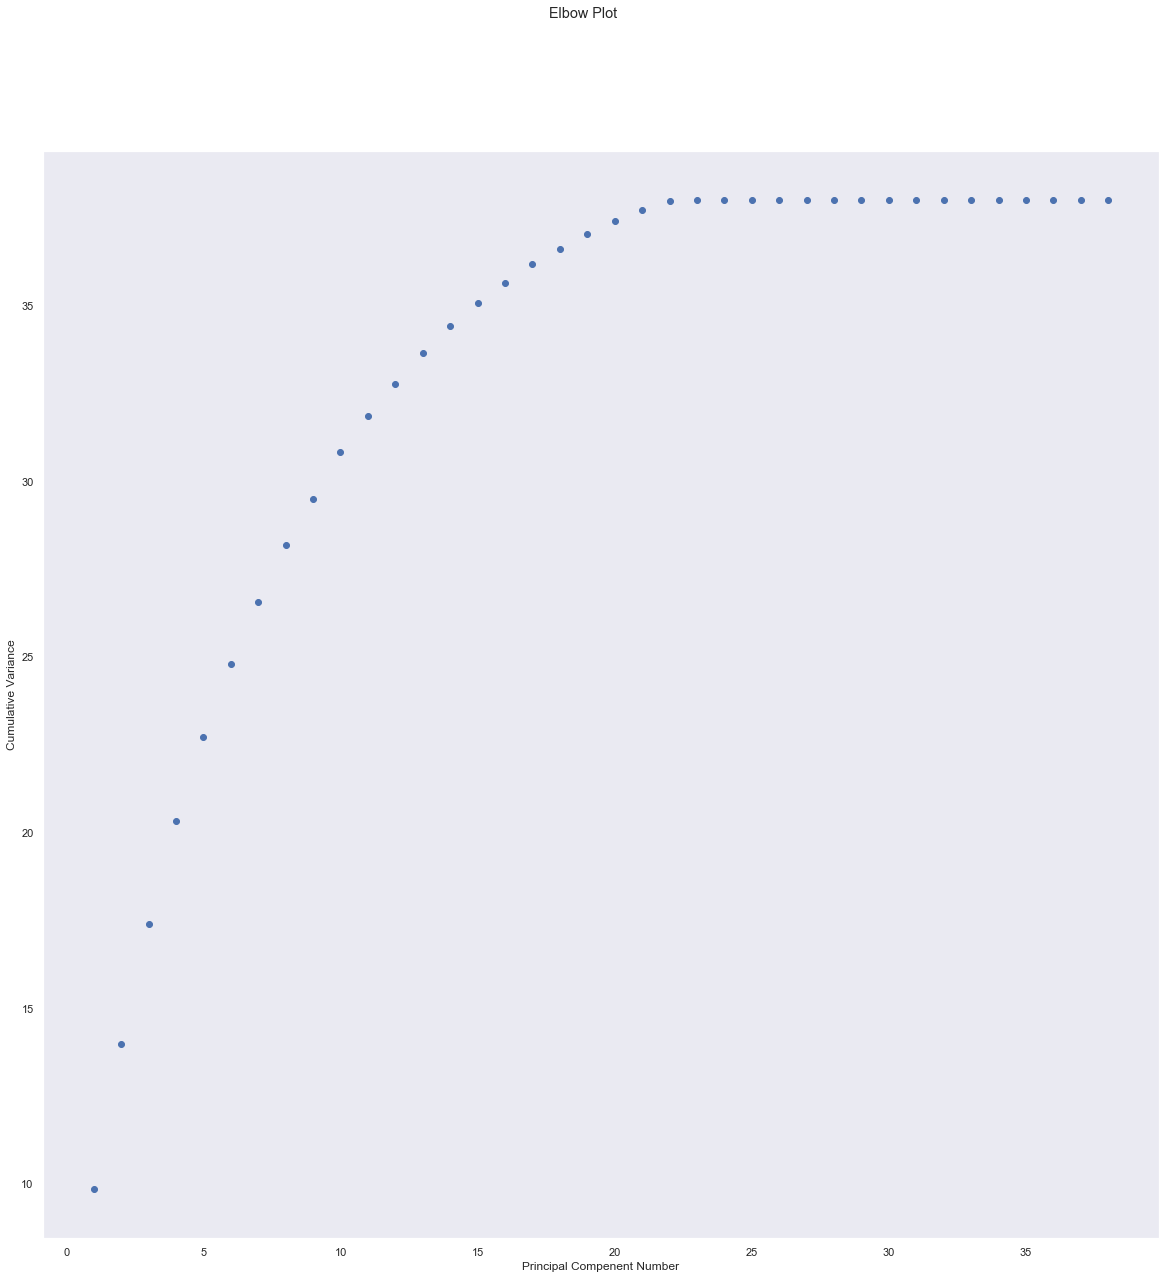

In [55]:
PCs = [x for x in range(1, len(cumulative_var)+1)]
plt.plot(PCs,cumulative_var, "bo")
plt.xlabel('Principal Compenent Number')
plt.ylabel('Cumulative Variance')
plt.suptitle('Elbow Plot')
plt.grid()
plt.show()

From the figure, we can see that the increase in variance flattens out after the 20th principal component. Hence we can use only the first 20 princial component directions to retain most of the variation in data.

In [56]:
chosen_eig_vecs = eig_vecs_desc[0:2]
chosen_eig_vecs

array([[-1.86706405e-01, -5.86343742e-01,  1.77943206e-01,
        -8.09092345e-02, -3.01085968e-02,  3.71493304e-03,
        -8.97647128e-02, -8.76301231e-02,  1.66985339e-01,
        -6.55261339e-02, -7.15983304e-02, -5.61285483e-02,
        -1.58310546e-01,  2.94294379e-02, -9.57822097e-03,
         1.86706405e-01,  5.86343742e-01, -1.77943206e-01,
        -3.85992091e-17,  8.09092345e-02, -5.60806295e-16,
         3.01085968e-02, -3.71493304e-03,  8.97647128e-02,
         8.76301231e-02, -1.66985339e-01,  6.55261339e-02,
         7.15983304e-02,  5.61285483e-02,  1.58310546e-01,
        -2.94294379e-02,  9.57822097e-03,  3.13741139e-16,
        -1.10022284e-16,  1.43300999e-16, -2.48821451e-17,
         7.13283091e-17,  0.00000000e+00],
       [-5.68226286e-02, -1.95473354e-02, -1.48773842e-01,
        -6.62185396e-02,  5.35322053e-03,  3.60602487e-02,
         2.19098222e-02,  8.24976730e-02,  7.21367532e-02,
         3.77097521e-01,  1.86287583e-01,  2.30065878e-01,
        -3.57

### Project the data set onto the chosen eigen vectors.

In [57]:
# standardized_data has samples in rows, transpose to get samples in columns
projected_samples = np.dot(chosen_eig_vecs, standardized_data.T)

# contains columns as samples. so transpose

projected_samples.T.shape

(8618, 2)

### Visualization the projection.

#### 2D

In [58]:
# For the sake of visualization, we can also project the samples onto the first two eigen vectors with maximum
# corresponding variances.


chosen_eig_vecs = eig_vecs_desc[0:2]

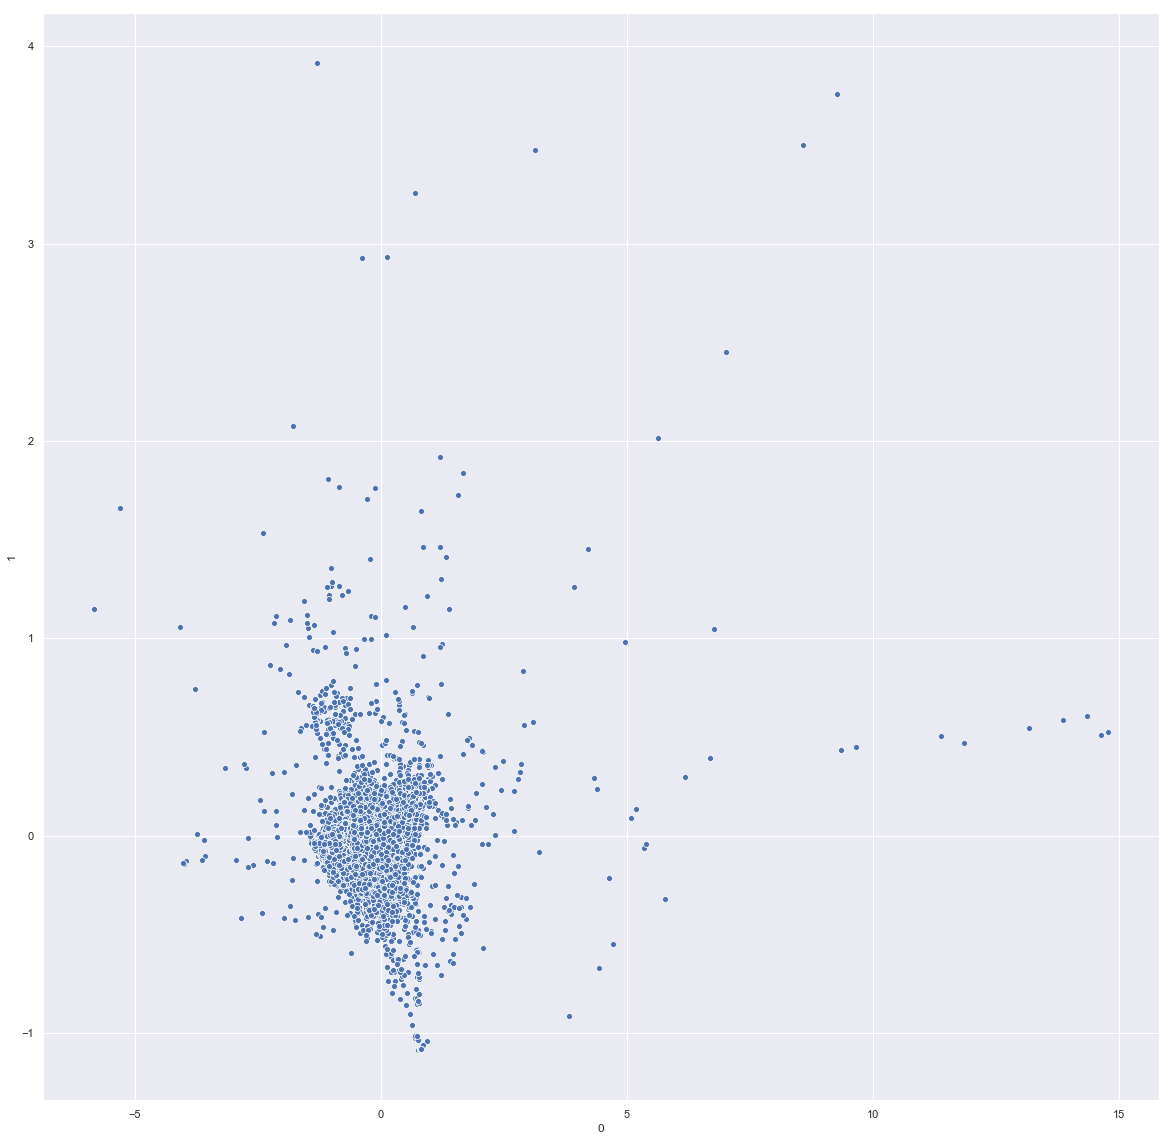

In [59]:
df_for_projection = pd.DataFrame(projected_samples)
sns.scatterplot(x = df_for_projection.iloc[0,:], y = df_for_projection.iloc[1,:], marker="o")
plt.show()

It is clear in the figure that the data is spread out on both the axis. Thus generated data can now be used to cluster the samples more confidently. 

#### 3D

In [60]:
chosen_eig_vecs = eig_vecs_desc[0:3]
# standardized_data has samples in rows, transpose to get samples in columns
projected_samples = np.dot(chosen_eig_vecs, standardized_data.T)
# contains rows as features, so transpose

projected_samples.T[0:10]

array([[ 0.75819192, -0.84453051, -1.40194342],
       [ 0.77090078, -0.83985683, -1.40436455],
       [ 0.80311129, -1.07403264, -1.76624901],
       [-0.06543216, -0.15365694,  0.29608831],
       [-0.06356053, -0.12858   ,  0.40554691],
       [-0.36104808, -0.22118222,  0.05253743],
       [-0.11256545, -0.12270045,  0.25296735],
       [-0.18966409, -0.12859224,  0.46022372],
       [-0.03804385, -0.19407421,  0.40162499],
       [-0.08592097, -0.16372217,  0.36319774]])

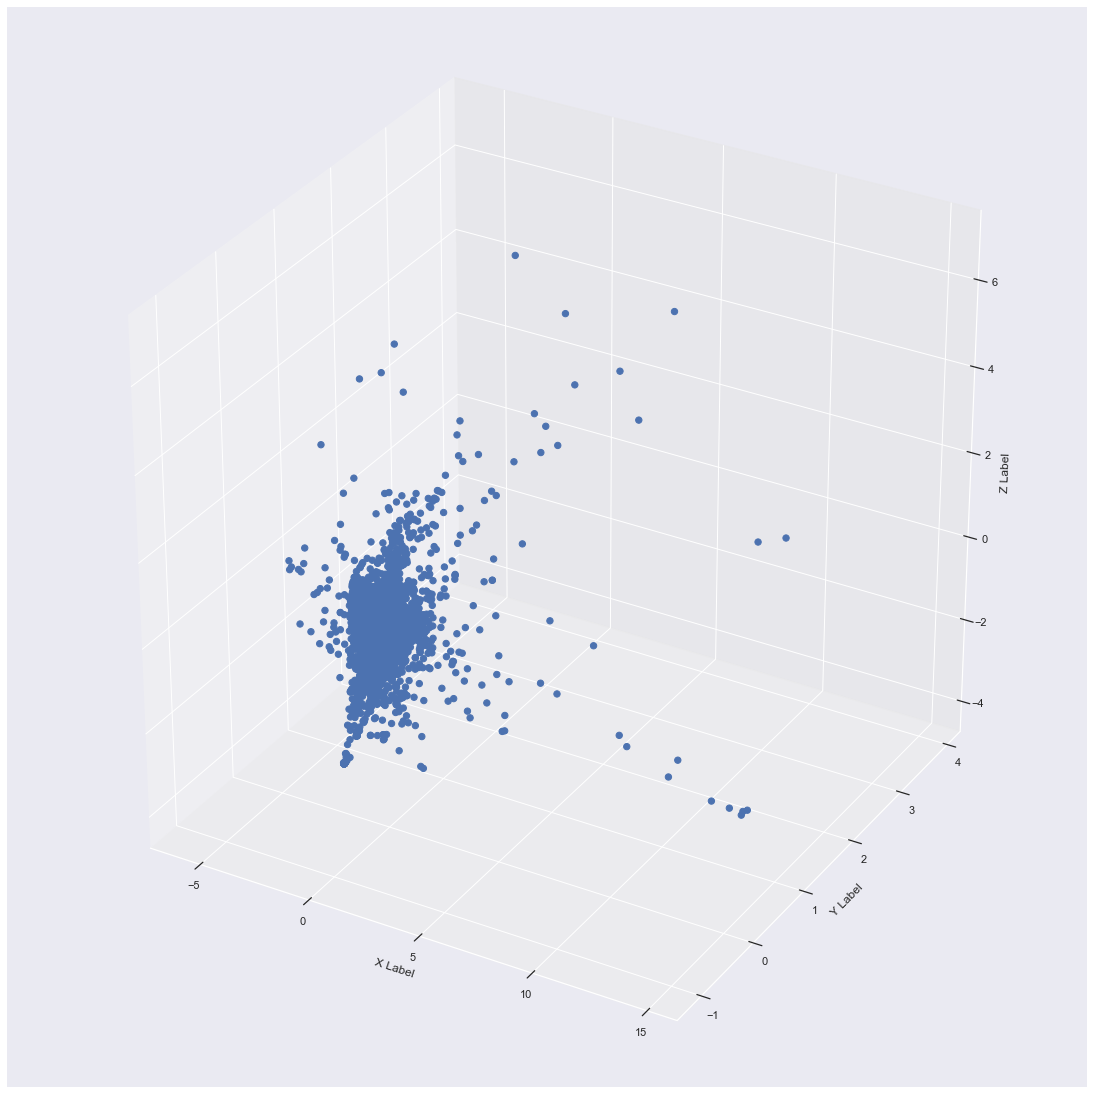

In [61]:
col_names = ["PC1", "PC2", "PC3"]
df_for_projection = pd.DataFrame(projected_samples.T)
df_for_projection.columns = col_names

fig = plt.figure(figsize=(15,15))

ax = Axes3D(fig)
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())


PC1 = projected_samples[0,:]
PC2 = projected_samples[1,:]
PC3 = projected_samples[2,:]

sc = ax.scatter(PC1, PC2, PC3, s=40, marker='o', cmap=cmap, alpha=1)

#sc = ax.scatter(df_for_projection.iloc[:,0], df_for_projection.iloc[:,1], df_for_projection.iloc[:,2], s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
#plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# sns.scatterplot(data = df_for_projection, marker="+", style="time")
# plt.figure(figsize = (30,20))

plt.show()